In [34]:
# load data
%pylab
%matplotlib inline
import pandas as pd
from google.colab import files
uploaded = files.upload()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


Saving University statistics - Overseas Chinese Summary.csv to University statistics - Overseas Chinese Summary (5).csv


In [35]:
import io
my_data = pd.read_csv(io.BytesIO(uploaded['University statistics - Overseas Chinese Summary.csv']),
                    header=0, index_col='School')
my_data.head()

,Country,System,Date,Total students number,Overseas Chinese students number,Percentage of All,Reference,Notes,Unnamed: 9,Unnamed: 10
School,,,,,,,,,,
US Total,US,Undergrad,2018,21900000.0,NaN,NaN,https://www.statista.com/statistics/235406/und...,NaN,NaN,NaN
US Total,US,Post-baccalaureate,2016,2972000.0,NaN,NaN,https://www.statista.com/statistics/236668/us-...,NaN,NaN,NaN
US Total,US,Un;post,2019,NaN,282276.0,0.011349,UG + PG,NaN,NaN,NaN
Stanford,US,Undergrad,2019,6996.0,NaN,NaN,https://facts.stanford.edu/,NaN,NaN,NaN
Stanford,US,Post-baccalaureate,2019,9390.0,NaN,NaN,https://facts.stanford.edu/,NaN,NaN,NaN


In [36]:
# Overseas Chinese student number & percentage
chinese = my_data[my_data['Overseas Chinese students number'].notnull()]
chinese['Overseas Chinese students number'] = chinese['Overseas Chinese students number'].astype(int)
chinese['Percentage of All'] = chinese['Percentage of All'].astype(float)
chinese_num_s = chinese.sort_values(by='Overseas Chinese students number', ascending=False)
chinese_pct_s = chinese.sort_values(by='Percentage of All', ascending=False)

num_of_country = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

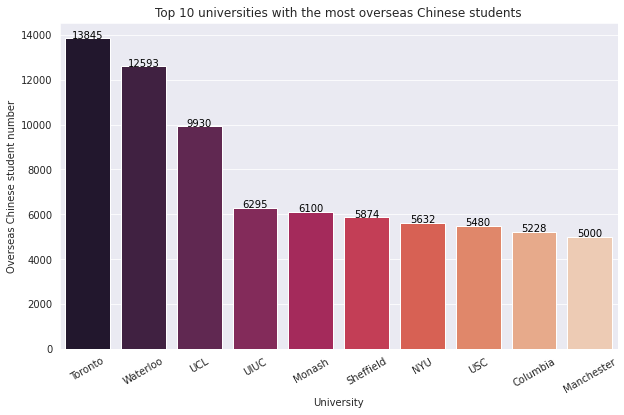

In [54]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.title("Top 10 universities with the most overseas Chinese students")

# Bar chart showing top 10 universities with the most overseas Chinese students
x=chinese_num_s.index[num_of_country:num_of_country+10]
y=chinese_num_s['Overseas Chinese students number'][num_of_country:num_of_country+10]
g = sns.barplot(x=x, y=y, palette="rocket")

plt.ylabel("Overseas Chinese student number")
plt.xlabel("University")
plt.xticks(rotation=30)

for i, v in enumerate(y):
    g.text(i, v+1, str(v), color='black', ha='center')

In [14]:
# Total student number
total = my_data[my_data['Total students number'].notnull()]
total['Total students number'] = total['Total students number'].astype(int)
total.head()

ValueError: ignored